In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
from prob_rob.gaussian_filters import KalmanFilter

In [5]:
def noisy_voltage(init_voltage, noise, change, count):
    voltage = init_voltage
    for i in range(count):
        yield voltage, random.gauss(voltage, noise)
        voltage = voltage + change

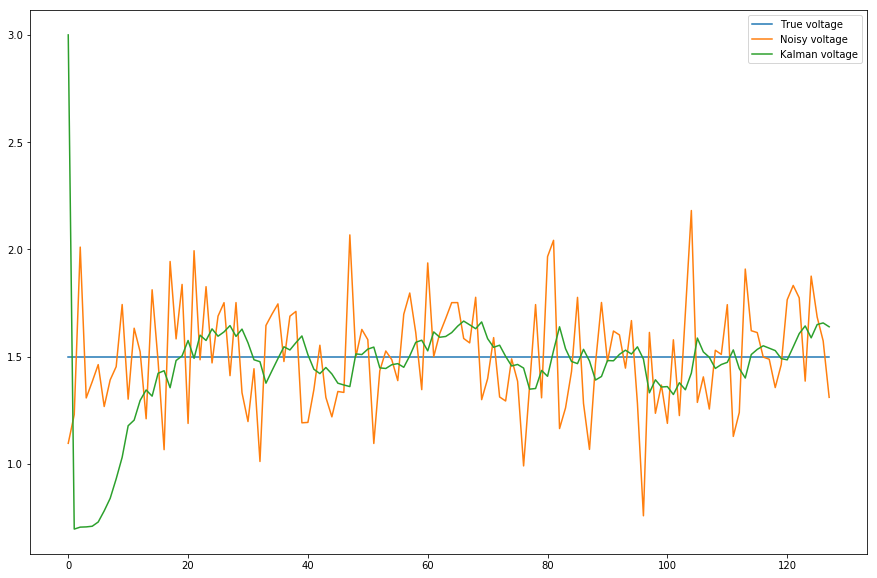

In [11]:
voltage_true = []
voltage_noisy = []
voltage_kalman = []

voltage = 1.5
voltage_change = 0
noise = 0.25
steps = 128

A = np.matrix([1.0])
B = np.matrix([0.0])
C = np.matrix([1.0])

R = np.matrix([0.1])
Q = np.matrix([0.00001])

mean = np.matrix([3])
cov = np.matrix([1])

#TODO: multi-variable test
kf = KalmanFilter(A, B, C, mean, cov, R, Q)

for meas in noisy_voltage(voltage, noise, voltage_change, steps):
    vtrue = meas[0]
    vnoise = meas[1]
    vkf = kf.mean[0, 0]
    
    voltage_true.append(vtrue)
    voltage_noisy.append(vnoise)
    voltage_kalman.append(vkf)
    
    kf.step(np.matrix([voltage_change]), np.matrix([vnoise]))

x = np.arange(0, steps)
plt.figure(figsize=(15, 10))
plt.plot(x, voltage_true, label='True voltage')
plt.plot(x, voltage_noisy, label='Noisy voltage')
plt.plot(x, voltage_kalman, label='Kalman voltage')
plt.legend()